In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df= pd.read_csv("datan.csv")
#can also use df=pd.read_fwf("http://www.stat.ufl.edu/~winner/data/airq402.dat",names=df_col)
#and before this can add colums in df_col  , prefering excel to get a good preveiw of data.

#Ans 1.Import and store the data in a data frame.

In [8]:
df.sample(10)

,City1(Origin),City2(Destination),Average Fare(Across all Airlines),Distance,Average weekly passengers,market leading airline,market share(Leading Airline),Average fare(Leading Airline),Low price airline,market share(Lowest Price Airline),price(Actual)
577,IAH,JAN,82.70,359,298.15,WN,77.87,78.84,WN,77.87,78.84
283,ORD,MHT,151.27,843,533.91,UA,55.78,163.75,WN,38.64,128.79
163,BWI,TPA,125.09,842,1071.63,WN,55.01,128.39,FL,27.15,115.16
308,ORD,SAT,188.15,1041,536.73,AA,48.68,189.24,WN,13.06,182.69
397,DFW,LBB,77.76,293,770.97,WN,85.36,76.02,WN,85.36,76.02
646,MCI,PHL,150.22,1038,331.08,US,74.22,148.14,AA,8.27,140.81
149,BWI,MCO,123.67,787,1519.89,WN,56.01,125.67,FL,27.80,116.58
526,FLL,MSY,134.72,673,349.89,WN,75.48,138.30,DL,15.78,122.91
911,PHX,STL,154.09,1262,687.17,WN,46.01,147.61,WN,46.01,147.61
300,ORD,PVD,141.52,849,770.97,UA,35.64,149.77,WN,29.21,130.03


In [9]:
df.head()

,City1(Origin),City2(Destination),Average Fare(Across all Airlines),Distance,Average weekly passengers,market leading airline,market share(Leading Airline),Average fare(Leading Airline),Low price airline,market share(Lowest Price Airline),price(Actual)
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [10]:
q1=df.quantile(0.25)

In [11]:
q3=df.quantile(0.75)

In [12]:
iqr=q3-q1

In [13]:
iqr

Average Fare(Across all Airlines)      71.4175
Distance                              899.0000
Average weekly passengers             512.7150
market share(Leading Airline)          27.0000
Average fare(Leading Airline)          78.8925
market share(Lowest Price Airline)     39.7775
price(Actual)                          54.7625
dtype: float64

In [14]:
lower_bound = q1 -(1.5 * iqr) 

In [15]:
upper_bound = q3 +(1.5 * iqr)

In [16]:
df1=df[~((df<lower_bound)|(df>upper_bound)).any(axis=1)]
#Outliers Removed
#Ans2.Remove the outliers from the data 

In [17]:
df1

,City1(Origin),City2(Destination),Average Fare(Across all Airlines),Distance,Average weekly passengers,market leading airline,market share(Leading Airline),Average fare(Leading Airline),Low price airline,market share(Lowest Price Airline),price(Actual)
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [18]:
y=df['Average Fare(Across all Airlines)']

In [19]:
x=df.drop("Average Fare(Across all Airlines)",axis=1)
#Ans3.Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. 

In [20]:
df1.corr()

,Average Fare(Across all Airlines),Distance,Average weekly passengers,market share(Leading Airline),Average fare(Leading Airline),market share(Lowest Price Airline),price(Actual)
Average Fare(Across all Airlines),1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average weekly passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market share(Leading Airline),-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Average fare(Leading Airline),0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market share(Lowest Price Airline),-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price(Actual),0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


In [21]:
df2=df1.drop(['Average weekly passengers','market share(Leading Airline)','market share(Lowest Price Airline)'], axis=1)

In [22]:
#Ans4.Drop the independent variables which has less than 0.1 correlation with the dependent variable.

In [23]:
df2


,City1(Origin),City2(Destination),Average Fare(Across all Airlines),Distance,market leading airline,Average fare(Leading Airline),Low price airline,price(Actual)
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42
5,ALB,FLL,135.17,1204,WN,137.97,DL,127.69
6,ALB,LAS,152.85,2237,WN,148.59,WN,148.59
7,ALB,LAX,190.73,2467,DL,205.06,US,174.00
8,ALB,MCO,129.35,1073,WN,127.69,WN,127.69
9,ALB,TPA,134.17,1130,US,132.91,DL,124.78


In [24]:
Y=df2['Average Fare(Across all Airlines)']

In [25]:
X=df2.drop(["Average Fare(Across all Airlines)","City1(Origin)","City2(Destination)","Low price airline"," market leading airline"],axis=1)

In [26]:
import seaborn as sns

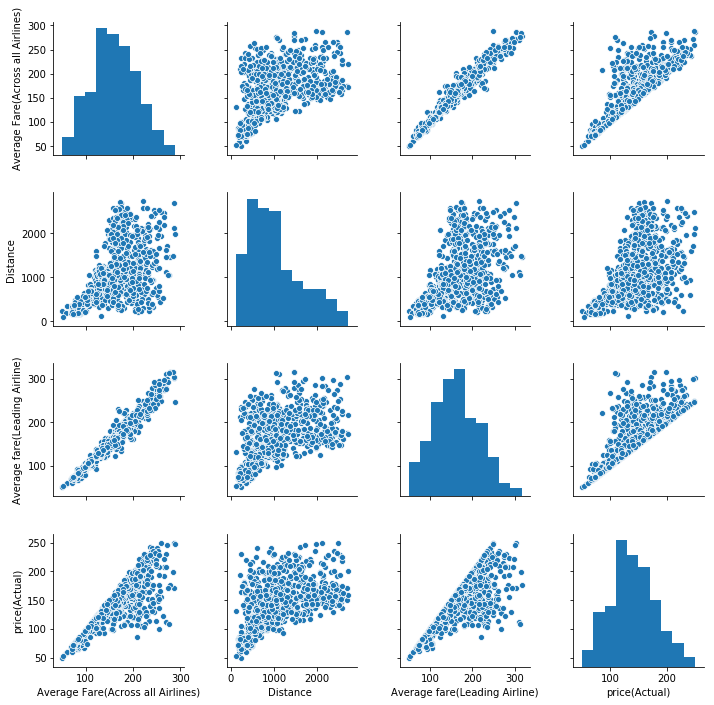

In [27]:
sns.pairplot(df2)


In [28]:
#Ans5.Create scatter Plot of Independent Variable vs Dependent Variable. 

In [29]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size=.20, random_state=1)

In [30]:
#Ans6.Divide the data set into training and test data set and build a Multiple Linear Regression model.

In [31]:
from sklearn import linear_model

In [32]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

In [33]:
predictions = lm.predict(X_test)

In [34]:
predictions

array([160.41528019, 144.3541106 ,  85.96736939, 110.0218442 ,
       112.71948092,  72.86913656, 131.6411907 ,  83.81684497,
       176.29916977, 211.54595436, 177.50232191,  90.9475853 ,
       133.12386773, 166.22278921, 210.5939895 , 192.81862847,
       165.6119807 , 124.4903543 , 146.01040383, 208.82061547,
       120.34254141, 228.58915244, 180.52960926,  99.10130525,
       261.25155107, 254.47434287,  76.85634683, 286.97622182,
       142.62130032, 268.0980894 ,  78.42780158, 169.65965796,
        80.32499536, 119.39603369, 116.3932052 , 140.04467679,
       174.78143795, 229.12251105, 160.11258394, 137.75938558,
       131.13703406, 125.32110852, 171.72182387,  80.54475263,
       131.47287916, 265.21764884, 130.94835847, 166.94587222,
       162.23658344,  90.42564082, 215.89753909, 148.71572034,
       122.7139189 , 212.45642591, 184.62746533, 224.8268451 ,
        78.83300213, 120.14604925, 148.359822  , 208.52803477,
       179.34319874, 166.83934208, 160.60497858, 222.89

In [35]:
lm.coef_

array([0.00170303, 0.74970197, 0.21801894])

In [36]:
lm.intercept_

5.741402943974435

In [37]:
#Ans7.Print the coefficients & intercepts of the linear regression model 

In [40]:
lm.score(X,Y)
#we can also use
#from sklearn.metrics import explained_variance_score
#explained_variance_score(Y_test,predictions)

0.9708282329278434

In [41]:
#Ans8.Print the accuracy of the overall model 